# Digit Recognizer

Learning Computer Vision Fundamentals With the Famous MNIST data

# Predicting Hand Drawn Digits from Zero to Nine

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#I like to see how the sample_submission file looks
sample_submission.head(5)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
train.shape

(42000, 785)

28.0 28.0


Text(0.5, 1.0, 'First Image')

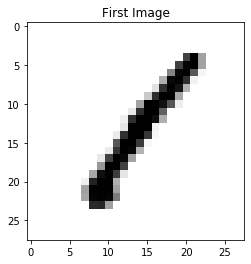

In [5]:
#We should see how the First Image looks like

image_size = np.sqrt(784)
print(image_size,image_size)
#Our image is a 28 by 28 image
first_image = train.iloc[0,1:]
np_image = first_image.values
np_image = np_image.reshape(28,28)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np_image,'gray_r')
plt.title('First Image')

Text(0.5, 1.0, 'Second Image')

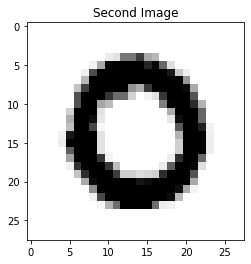

In [6]:
#what do we know the above to be?
#lets try to show the second image

second_image = train.iloc[1,1:]
np1_image = second_image.values.reshape(28,28)
plt.imshow(np1_image,'gray_r')
plt.title('Second Image')

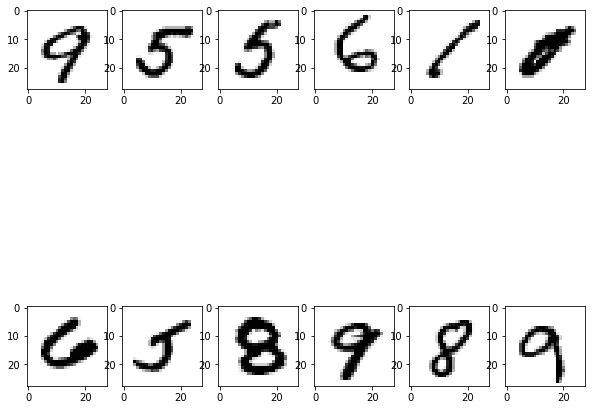

In [7]:
#This looks like a Zero. Lets plot more images

#We show the images in number 100,151,345,980,1980,6543,1200,3450,23499,33990, 3345 and 23675.

f, axarr = plt.subplots(2, 6,figsize=(10,10))

axarr[0, 0].imshow(train.iloc[100,1:].values.reshape(28,28), cmap='gray_r')
axarr[0, 1].imshow(train.iloc[151,1:].values.reshape(28,28), cmap='gray_r')
axarr[0, 2].imshow(train.iloc[345,1:].values.reshape(28,28), cmap='gray_r')
axarr[0, 3].imshow(train.iloc[980,1:].values.reshape(28,28), cmap='gray_r')
axarr[0, 4].imshow(train.iloc[1980,1:].values.reshape(28,28), cmap='gray_r')
axarr[0, 5].imshow(train.iloc[6543,1:].values.reshape(28,28), cmap='gray_r')

axarr[1, 0].imshow(train.iloc[1200,1:].values.reshape(28,28), cmap='gray_r')
axarr[1, 1].imshow(train.iloc[3450,1:].values.reshape(28,28), cmap='gray_r')
axarr[1, 2].imshow(train.iloc[23499,1:].values.reshape(28,28), cmap='gray_r')
axarr[1, 3].imshow(train.iloc[33990,1:].values.reshape(28,28), cmap='gray_r')
axarr[1, 4].imshow(train.iloc[3345,1:].values.reshape(28,28), cmap='gray_r')
axarr[1, 5].imshow(train.iloc[23675,1:].values.reshape(28,28), cmap='gray_r')

# Next Steps

Using Machine Learning, especially Neural Networks we would predict this images. We have 42000 images for our train data set and another 28000 for test dataframe.

<br> We would also use the cross validation test, to improve our Model

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#It is recommended that we train the data with 80% data and we test with the remaining 20%
all_y = train['label']
all_X = train.drop('label',axis=1)

X_train,X_test,y_train,y_test = train_test_split(all_X,all_y,test_size=0.2,random_state=3)

#training a Neural Network with 3 hidden Layers with 50 layers first, 20 layers 2nd, 20 layers 3rd
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(50,20,20))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [43]:
print(predictions)
print(len(y_test))
accuracy = sum(predictions == y_test)
print(accuracy)
Percentage = (int(accuracy)/int(len(y_test)))*100
print(Percentage)

over_all = {'predictions':predictions,'actual_result':y_test}
over_all_df = pd.DataFrame(over_all)
over_all_df.head(20)

[4 4 6 ... 7 1 5]
8400
7988
95.0952380952381


,predictions,actual_result
18193,4,4
19544,4,4
35241,6,6
27327,9,9
19331,6,6
5747,9,8
38657,1,1
22585,4,4
13934,5,5
16517,6,6


# Observations

We notice that the Neural Network we developed, predicted 7988 correct values out of 8400 values, which is about 95% accurate.

<br> Before using the Model to predict on the test dataframe for submission, i will like to see if the accuracy of this model can be improved on using KFOLD.

In [44]:
scores = cross_val_score(mlp,all_X,all_y,cv=10)
accuracy = scores.mean()

# Notes

I would love to continue to experimenting with the different models available and testing different hyperparameters but since the model keeps slowing down my PC, i will upload this work and see what results i obtain.

In [45]:
print(accuracy)

0.955976193795418


Dividing the Dataset into a fold of 10 Didn't improve so much the accuracy we earlier had.

In [46]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
import numpy as np
Predictions_submit = mlp.predict(test)
numbers = [i for i in np.arange(1,28001)]
submission_df = {'ImageID':numbers ,'label':Predictions_submit}
submission = pd.DataFrame(submission_df)
submission.head(5)

,ImageID,label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [60]:
submission.to_csv('submissions.csv',index=False)